# Project:
### The purpose of this project is to predict the expected grossing of our Christmas movie titled "The Magic of Bellmonte Lane".
### After cleaning and validating the data, EDA and predictive modelling revealed the following insights about the expected value of our grossing for the movie. The executive summary of recommendations and the processes leading to these conclusions are narrated below.

# Findings: 
### 1, Our predicted grossing for "The Magic of Bellmonte Lane" is $79,638,336.

### 2, Greta Gerwig is a good choice for director, based on the data we have. 

### 3, Outside of Christmas movies, the average grossing for movies with a 25-milion-dollar budget is $81,801,123.

### 4, Our predicted grossing of $79,638,336 is a decent figure, but we can always look to make more. I recommend we flavor the trailer of "The Magic of Bellmonte Lane" with a lot of romance and drama.

### However, our prediction might change if we're able to build a more accurate model. To achieve this, we will need to have more accurate features supplied in the original Christmas movie dataset, e.g a column for budgets of Christmas movies, a complete column with no (or very few) missing values for grossings of Christmas movies, and the type of rating our movie will have.

## THE PROCESS ↓

## **Data cleaning, validation and EDA**

In [2]:
# Let's import the necesary libraries to read, clean and visualize the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Next, let's read the main data and see what it looks like, dropping duplicated rows and empty columns along the way

xmas = pd.read_csv('data/christmas_movies.csv').drop_duplicates().dropna(how = 'all', axis = 1)
display(xmas.head(), xmas.tail())

# also, let's see the data types of the columns in the dataframe, while also checking the columns with missing values

print(xmas.info())

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M


,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
783,Heston's Fantastical Food: Heston's Fantastica...,2012.0,Add a Plot,TV Episode,NaN,NaN,NaN,Documentary,Jay Taylor,"Heston Blumenthal, George Hill, Marc Meltonvil...",NaN
784,Cosmic Cowboys: Céréal Christmas,2004.0,Add a Plot,TV Episode,NaN,NaN,NaN,Animation,NaN,NaN,NaN
785,Proper Manors: Christmas Special: Christmas Pa...,2012.0,Miles Barnes is forced to throw contractually-...,TV Episode,NaN,20.0,NaN,"Action, Comedy, Crime",Dallin Boyce,"Brandyn Cross, Peter D'Alessio, Janis Race-Big...",NaN
786,Being Millennialish: A Very Millennial Christm...,2015.0,Add a Plot,TV Episode,NaN,NaN,NaN,NaN,Leslie Delery,NaN,NaN
787,Sacred Music at Christmas: A Choral Christmas,2010.0,Add a Plot,TV Episode,NaN,NaN,NaN,"Documentary, Music",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         788 non-null    object 
 1   release_year  780 non-null    float64
 2   description   788 non-null    object 
 3   type          788 non-null    object 
 4   rating        646 non-null    object 
 5   runtime       749 non-null    float64
 6   imdb_rating   749 non-null    float64
 7   genre         787 non-null    object 
 8   director      783 non-null    object 
 9   stars         776 non-null    object 
 10  gross         81 non-null     object 
dtypes: float64(3), object(8)
memory usage: 73.9+ KB
None


In [3]:
# Data cleaning.
# Let's strip the letter M and the dollar sign ($) off the figures in the "gross" column and convert the figures to actual digits in millions (by multiplying the stripped figures by 1,000,000) while rounding off the decimals

xmas['gross'] = xmas['gross'].str.replace("$", "").str.replace("M", "").astype('float') * 1000000
xmas['gross'] = xmas['gross'].round(2)

# Let's now drop rows in the "gross" column that have null values, since we won't need those null values while training our model. We don't want to replace these null values in the column with the median value, so as not to have a false sense of grossing figures.

xmas = xmas.dropna(subset = 'gross')

# in the cell above, we see that the "release_year" column is a float type, we're now converting the column to a date time type and extracting the year 

xmas['release_year'] = pd.to_datetime(xmas['release_year'], format='%Y').dt.year

# a quick check to see what the "release_year" column data type is now
print ("release_year data type is", xmas['release_year'].dtypes, ", so it's now an integer.")

# and finally, let's see what our "xmas" dataframe looks like at the moment

display(xmas.head())


release_year data type is int64 , so it's now an integer.


,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59700000.0
1,National Lampoon's Christmas Vacation,1989,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71320000.0
3,Home Alone,1990,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0
4,How the Grinch Stole Christmas,2000,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260040000.0
5,Elf,2003,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,"Adventure, Comedy, Family",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",173400000.0


In [4]:
# Checking columns, their data types and missing values for each column
xmas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 587
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         81 non-null     object 
 1   release_year  81 non-null     int64  
 2   description   81 non-null     object 
 3   type          81 non-null     object 
 4   rating        81 non-null     object 
 5   runtime       81 non-null     float64
 6   imdb_rating   81 non-null     float64
 7   genre         81 non-null     object 
 8   director      81 non-null     object 
 9   stars         81 non-null     object 
 10  gross         81 non-null     float64
dtypes: float64(3), int64(1), object(7)
memory usage: 7.6+ KB


## Data validation. 
## After cleaning the data, I validated the data by checking each column individually to ensure the following:
## 
## 'title' column, contains the title of each movie. The data type is 'object' and has no missing values. 
## 'release_year' column, contains the year the movie was released. The data type is integer and has no missing values. 
## 'description' column, a short description of the movie. The data type is 'object' and has no missing values. 
## 'type' column, the type of production. The data type is 'object' and has no missing values. 
## 'rating' column, the rating/certificate e.g. PG. The data type is 'object' and has no missing values. 
## 'runtime' column, the movie runtime in minutes. The data type is 'float' and has no missing values. 
## 'imdb_rating' column, the IMDB rating. The data type is 'object' and has no missing values.
## 'genre' column, the list of genres e.g. Comedy, Drama etc. The data type is 'object' and has no missing values. 
## 'director' column, the director of the movie. The data type is 'object' and has no missing values. 
## 'stars' column, a list of actors in the movie. The data type is 'object' and has no missing values. 
## 'gross' column, the domestic gross of the movie in US dollars. The data type is 'float' and has no missing values. 
## 
## All columns are as they should be.

## **Let's now check the next dataset and see how we can make use of it. First step is to view the dataset, clean it and validate the data.**

In [5]:
top1000 = pd.read_csv("data/imdb_top1k.csv")
movie_budgets = pd.read_csv("data/movie_budgets.csv")

In [6]:
# How many null values do we have in the top1k_movies dataset? and what are the data types?

top1000.info()

# let's also visualzie what the dataframe looks like

display(top1000.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  Gross          831 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


In [7]:
# Data cleaning.
# Starting with our point of interest, let's remove the commas in the "Gross" column of top1000 and convert the data type to floats for easier computation. Also, we will drop the rows in this column that have null values, so that it doesn't affect our model prediction

top1000['Gross'] = top1000['Gross'].str.replace("," , "").astype('float')
top1000 = top1000.dropna(subset = 'Gross')


# the "Released_Year" column is an "object", let's change it to an integer

top1000['Released_Year'] = pd.to_numeric(top1000['Released_Year'], errors='coerce').astype('Int64')

# let's convert the "Runtime" column from object to floats, after removing the "min" spellings in the column

top1000['Runtime'] = top1000['Runtime'].str.replace("min", "").astype('float')

#let's now see what our dataframe looks like so far

display(top1000.head())

# and let's see the data types of each column and how much null values we have
top1000.info()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0
1,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0
2,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0
3,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0
4,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  830 non-null    Int64  
 2   Certificate    785 non-null    object 
 3   Runtime        831 non-null    float64
 4   Genre          831 non-null    object 
 5   IMDB_Rating    831 non-null    float64
 6   Overview       831 non-null    object 
 7   Meta_score     750 non-null    float64
 8   Director       831 non-null    object 
 9   Star1          831 non-null    object 
 10  Star2          831 non-null    object 
 11  Star3          831 non-null    object 
 12  Star4          831 non-null    object 
 13  Gross          831 non-null    float64
dtypes: Int64(1), float64(4), object(9)
memory usage: 98.2+ KB


## **We have a third dataset called the "movies_budget". Only in this dataset do we see budgets of movies. We will try to utilize this dataset by merging it with the top1000 dataset so that we can see the budgets of movies that are rated in the top 1000.**

In [8]:
# the "Series_Title" column in the top1000 dataset is  an object type but the "Released_Year" column is an integer.

top1000[['Series_Title', 'Released_Year']].dtypes

Series_Title     object
Released_Year     Int64
dtype: object

In [9]:
# the "title" column in the movie_budgets dataset is also of the "object" type, but the "year" column is a float type

movie_budgets[['title', 'year']].dtypes

title     object
year     float64
dtype: object

In [10]:

# we will have to convert the "year" column in the movies_budget dataset to an integer (like the "Released_Year" column in the top1000 dataset), so we can be able to merge both datasets on these similar columns for accuracy in our matches

movie_budgets['year'] = pd.to_numeric(movie_budgets['year'], errors='coerce').astype('Int64')

# a quick detour to change the name of the "production budget" column in the movie_budgets dataframe to "budget" for quicker typing while computing

movie_budgets.rename(columns = {'production budget' : 'budget'}, inplace = True)

# after converting the "year" column in the movies_budget dataset to an integer, then we merge both of our datasets (top1000 and movie_budgets) on columns that they both have in common, i.e the titles of the films and the years they were released.
# we are trying to get the budgets for the top 1000 movies, and since both of these information are contained in different datasets, we combine the two datasets to get the desired result.
# Our new merged dataframe will contain "title" and "year" columns, among others. We will  drop these "title" and "year" columns since we already have their information contained in the "Series_Title" and "Released_Year" columns of our new dataframe

top1000_budgets = pd.merge(top1000, movie_budgets, left_on = ['Series_Title', 'Released_Year'], right_on = ['title', 'year'], how= 'inner').drop(['title', 'year'], axis = 1)

# now let's see what our newly merged dataframe looks like
top1000_budgets.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross,date,budget
0,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0,"Sep 23, 1994",25000000
1,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0,"Mar 15, 1972",7000000
2,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0,"Jul 11, 2008",185000000
3,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0,"Dec 11, 1974",13000000
4,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0,"Apr 13, 1957",340000


## **More EDA**

In [11]:
# We want to see what the average grossing is for movies in our budget range. First, we subset for movies whose budgets fall in our price range, $25m

budget_25m = top1000_budgets[top1000_budgets['budget'] == 25000000]

# then we find the average grossing a movie gets if it's produced with a $25m budget

print("The average grossing for movies with a $25m budget is " + "$" + str(budget_25m['Gross'].mean().round(2)) + "m"  )

# let's visualize the budget_25m dataframe, which contains movies whose budgets are $25m, from which we got our averge grossing
display(budget_25m.head())

The average grossing for movies with a $25m budget is $81801123.12m


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross,date,budget
0,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0,"Sep 23, 1994",25000000
7,Schindler's List,1993,A,195.0,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,96898818.0,"Dec 15, 1993",25000000
14,Goodfellas,1990,A,146.0,"Biography, Crime, Drama",8.7,The story of Henry Hill and his life in the mo...,90.0,Martin Scorsese,Robert De Niro,Ray Liotta,Joe Pesci,Lorraine Bracco,46836394.0,"Sep 19, 1990",25000000
60,Scarface,1983,A,170.0,"Crime, Drama",8.3,"In 1980 Miami, a determined Cuban immigrant ta...",65.0,Brian De Palma,Al Pacino,Michelle Pfeiffer,Steven Bauer,Mary Elizabeth Mastrantonio,45598982.0,"Dec 9, 1983",25000000
70,Warrior,2011,UA,140.0,"Action, Drama, Sport",8.2,The youngest son of an alcoholic former boxer ...,71.0,Gavin O'Connor,Tom Hardy,Nick Nolte,Joel Edgerton,Jennifer Morrison,13657115.0,"Sep 9, 2011",25000000


## The average grossing for movies with a 25-milion-dollar budget is $81,801,123

In [12]:
# Let's look at the best Christmas movies that made it to the top 1000. Who directed these movies? Who are the casts? Could we have gotten the same set of cast for our movie? 
# We answer these questios by merging the dataset that contains Christmas movies with the one that contains the top 1000 rated movies. (While merging these datasets, we are dropping columns that are duplicated)

xmas_top1000 = pd.merge(top1000, xmas, left_on = ['Series_Title', 'Director'], right_on = ['title', 'director'], how = 'inner').drop( ['Series_Title', 'Director', 'Genre', 'Overview', 'runtime' , 'imdb_rating', 'Released_Year', 'stars' ], axis = 1)
xmas_top1000

,Certificate,Runtime,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,Gross,title,release_year,description,type,rating,genre,director,gross
0,U,125.0,8.3,94.0,Jack Lemmon,Shirley MacLaine,Fred MacMurray,Ray Walston,18600000.0,The Apartment,1960,A Manhattan insurance clerk tries to rise in h...,Movie,Approved,"Comedy, Drama, Romance",Billy Wilder,18600000.0
1,A,132.0,8.2,72.0,Bruce Willis,Alan Rickman,Bonnie Bedelia,Reginald VelJohnson,83008852.0,Die Hard,1988,A New York City police officer tries to save h...,Movie,R,"Action, Thriller",John McTiernan,83010000.0
2,Passed,95.0,8.2,NaN,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,5450000.0,The Gold Rush,1925,A prospector goes to the Klondike during the 1...,Movie,Passed,"Adventure, Comedy, Drama",Charles Chaplin,5450000.0
3,NaN,99.0,8.1,96.0,Margaret Sullavan,James Stewart,Frank Morgan,Joseph Schildkraut,203300.0,The Shop Around the Corner,1940,Two employees at a gift shop can barely stand ...,Movie,Not Rated,"Comedy, Drama, Romance",Ernst Lubitsch,200000.0
4,U,76.0,8.0,82.0,Danny Elfman,Chris Sarandon,Catherine O'Hara,William Hickey,75082668.0,The Nightmare Before Christmas,1993,"Jack Skellington, king of Halloween Town, disc...",Movie,PG,"Animation, Family, Fantasy",Henry Selick,75080000.0
5,U,105.0,7.9,74.0,Johnny Depp,Winona Ryder,Dianne Wiest,Anthony Michael Hall,56362352.0,Edward Scissorhands,1990,"An artificial man, who was incompletely constr...",Movie,PG-13,"Drama, Fantasy, Romance",Tim Burton,56360000.0
6,NaN,96.0,7.9,88.0,Edmund Gwenn,Maureen O'Hara,John Payne,Gene Lockhart,2650000.0,Miracle on 34th Street,1947,After a divorced New York mother hires a nice ...,Movie,Not Rated,"Comedy, Drama, Family",George Seaton,2650000.0
7,U,135.0,7.8,91.0,Saoirse Ronan,Emma Watson,Florence Pugh,Eliza Scanlen,108101214.0,Little Women,2019,"Jo March reflects back and forth on her life, ...",Movie,PG,"Drama, Romance",Greta Gerwig,108100000.0
8,A,122.0,7.7,81.0,Bradley Cooper,Jennifer Lawrence,Robert De Niro,Jacki Weaver,132092958.0,Silver Linings Playbook,2012,"After a stint in a mental institution, former ...",Movie,R,"Comedy, Drama, Romance",David O. Russell,132090000.0
9,G,85.0,7.7,64.0,Michael Caine,Kermit the Frog,Dave Goelz,Miss Piggy,27281507.0,The Muppet Christmas Carol,1992,The Muppets present their own touching renditi...,Movie,G,"Comedy, Drama, Family",Brian Henson,27280000.0


In [13]:

# Of these best Crhistmas movies, which one grossed the highest? The movie 'Little Women' directed by Greta Gerwig grossed the third highest.

xmas_top1000.sort_values(by = 'Gross', ascending = False).head(3)

,Certificate,Runtime,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,Gross,title,release_year,description,type,rating,genre,director,gross
10,U,103.0,7.6,63.0,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,285761243.0,Home Alone,1990,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,"Comedy, Family",Chris Columbus,285760000.0
8,A,122.0,7.7,81.0,Bradley Cooper,Jennifer Lawrence,Robert De Niro,Jacki Weaver,132092958.0,Silver Linings Playbook,2012,"After a stint in a mental institution, former ...",Movie,R,"Comedy, Drama, Romance",David O. Russell,132090000.0
7,U,135.0,7.8,91.0,Saoirse Ronan,Emma Watson,Florence Pugh,Eliza Scanlen,108101214.0,Little Women,2019,"Jo March reflects back and forth on her life, ...",Movie,PG,"Drama, Romance",Greta Gerwig,108100000.0


In [14]:
# In the cell above, we see that our director, Greta Gerwig, grossed the third highest figures for Christmas movies. This makes him a very good choice as a director for our movie. But then, can we get the budget for the 'Little Women' movie? Maybe it is within our budget range, then we can compare.

movie_budgets[(movie_budgets['title'] == 'Little Women') & (movie_budgets['year'] == '2019')]

,year,date,title,budget


### Recommendation:
### Unfortunately, due to this information being absent from our dataset, we couldn't get the budget for the movie 'Little Women' which was directed by Greta Gerwig and grossed $108,101,214 in 2019, so we do not know how the movie's budget will compare to ours. However, the movie falls in the genre of Drama and Romance, so I will recommend that our movie leans heavily on the Drama and Romance part.

In [15]:
# Back to our xmas dataset, let's visualize it again
xmas

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59700000.0
1,National Lampoon's Christmas Vacation,1989,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71320000.0
3,Home Alone,1990,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0
4,How the Grinch Stole Christmas,2000,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260040000.0
5,Elf,2003,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,"Adventure, Comedy, Family",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",173400000.0
...,...,...,...,...,...,...,...,...,...,...,...
206,Kirk Cameron's Saving Christmas,2014,His annual Christmas party faltering thanks to...,Movie,PG,79.0,1.3,"Comedy, Family",Darren Doane,"Kirk Cameron, Darren Doane, Bridgette Cameron,...",2780000.0
299,Christmas in Wonderland,2006,Three children and their father move from Los ...,Movie,PG,95.0,4.7,"Comedy, Crime, Family",James Orr,"Matthew Knight, Chris Kattan, Cameron Bright, ...",80000.0
471,The Gold Rush,1925,A prospector goes to the Klondike during the 1...,Movie,Passed,95.0,8.2,"Adventure, Comedy, Drama",Charles Chaplin,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",5450000.0
483,After the Thin Man,1936,Private detective Nick Charles and his wealthy...,Movie,Passed,112.0,7.6,"Comedy, Crime, Mystery",W.S. Van Dyke,"William Powell, Myrna Loy, James Stewart, Elis...",4340000.0


In [16]:
# We are trying to get our data ready for modelling. While we're looking ahead to eventually encode the columns with categorical variables in this dataset before building a predictive model, we have to understand what these columns contain. For example, if we check the first few rows of the "genre" column, we see that it contains variables like 
# "Comedy, Drama, Romance"
# "Comedy"
# "Comedy, Family"
# This tells us that there can be a few unique values separated by commas for each row we check in that column. We will now try to establish the number of unique values in each row in that column.  We see that the maximum number of unique values we have per row in that column is 3, so we will eventually split the column into 3 different columns, so that each column can contain only one value, and in that way, we can encode each column better before creating our model. Below, the list on the right is the actual number of unique variables per row, while the list on the left is just their corresponding row indexes.

xmas['genre'].astype(str).str.split(',').apply(len).sort_values(ascending = False).head(3)


0     3
74    3
89    3
Name: genre, dtype: int64

In [17]:
# We can do the same for the "stars" column, we'll have to split it into 6 columns

xmas['stars'].astype(str).str.split(',').apply(len).sort_values(ascending = False).head(3)

23    6
9     6
62    6
Name: stars, dtype: int64

In [18]:
# the "director" column has only one unique item per row. That is, each entry for a film has only one director

xmas['director'].astype(str).str.split(',').apply(len).sort_values(ascending = False).head(3)

0      1
65     1
101    1
Name: director, dtype: int64

In [19]:
# Here, we split the 'genre' column into 3 new columns named 'genre1', 'genre2' and 'genre3'. For these new columns, some of the entries will be empty, since not all entries will be filled out to complete 3 genres. Let's also replace these null values with an empty space, for easier computation while encoding our columns

xmas[['genre1', 'genre2', 'genre3']] = xmas['genre'].str.split(pat = ",", expand = True, regex = True).fillna(" ")

# We will do the same for the 'stars' column, and split it into 6 new columns

xmas[['star1', 'star2', 'star3', 'star4', 'star5', 'star6']] = xmas['stars'].str.split(pat = ",", expand = True, regex = True).fillna(" ")

# And let's see what our dataframe looks like
xmas.head()

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross,genre1,genre2,genre3,star1,star2,star3,star4,star5,star6
0,Love Actually,2003,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59700000.0,Comedy,Drama,Romance,Hugh Grant,Martine McCutcheon,Liam Neeson,Laura Linney,,
1,National Lampoon's Christmas Vacation,1989,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71320000.0,Comedy,,,Chevy Chase,Beverly D'Angelo,Juliette Lewis,Johnny Galecki,,
3,Home Alone,1990,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0,Comedy,Family,,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,,
4,How the Grinch Stole Christmas,2000,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260040000.0,Comedy,Family,Fantasy,Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,,
5,Elf,2003,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,"Adventure, Comedy, Family",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",173400000.0,Adventure,Comedy,Family,Will Ferrell,James Caan,Bob Newhart,Zooey Deschanel,,


In [20]:
# Here we see that none of the columns carry "null" values. But is this really true? Do we really have NO empty values at all? We'll double-check in the next cell

xmas.isna().sum()

title           0
release_year    0
description     0
type            0
rating          0
runtime         0
imdb_rating     0
genre           0
director        0
stars           0
gross           0
genre1          0
genre2          0
genre3          0
star1           0
star2           0
star3           0
star4           0
star5           0
star6           0
dtype: int64

## Let's double-check our features before we proceed. On checking the new columns, we discover that the 'star5' column contains a lot of empty values because it counts 75 for an empty space, while the 'star6' column is actually completely empty because it counts 81 for empty spaces. 
## 'star1' to 'star4' columns are normal (this information is shown in the hidden cells below).

In [21]:
# 'star6' column is completely empty, since an empty space cannot count as the name of a star/actor 

xmas['star6'].value_counts()

     81
Name: star6, dtype: int64

In [22]:
# 'star5' column contains 75 empty values

xmas['star5'].value_counts() 

                      75
 Pharrell Williams     1
 Jay Hernandez         1
 Jennifer Aniston      1
 Hugh Laurie           1
 Virginia Dale         1
 Helen Mirren          1
Name: star5, dtype: int64

In [23]:
xmas['star4'].tolist()

[' Laura Linney',
 ' Johnny Galecki',
 ' John Heard',
 ' Jeffrey Tambor',
 ' Zooey Deschanel',
 ' Thomas Mitchell',
 ' Vera-Ellen',
 ' Reginald VelJohnson',
 ' Rashida Jones',
 " Catherine O'Hara",
 ' Leslie Zemeckis',
 ' Eric Lloyd',
 ' John Glover',
 ' J.T. Walsh',
 ' Lucy Miller',
 ' Steve Valentine',
 ' Eric Lloyd',
 ' Gene Lockhart',
 ' Jerry Nelson',
 ' Robert Duvall',
 ' M. Emmet Walsh',
 ' Kathryn Hahn',
 ' John Ritter',
 ' Rita Wilson',
 ' T.J. Miller',
 ' William Hickey',
 ' Lenny von Dohlen',
 ' Kristin Davis',
 ' Eric Lloyd',
 ' Anthony Michael Hall',
 ' Burgess Meredith',
 ' Bill Nighy',
 ' John Michael Higgins',
 ' Mark Addy',
 ' John Saxon',
 ' Eliza Scanlen',
 ' Lucille Bremer',
 ' Kenneth More',
 ' Jack Dylan Grazer',
 ' Marjorie Reynolds',
 ' Don Cheadle',
 ' Chris Klein',
 ' Morgan Freeman',
 " Catherine O'Hara",
 ' James Brown',
 ' Abe Vigoda',
 ' Joseph Schildkraut',
 ' Christina Hendricks',
 ' Miriam Margolyes',
 ' Chris Pine',
 ' Claire Danes',
 ' Gary Cole',
 ' 

In [24]:
xmas['star3'].tolist()

[' Liam Neeson',
 ' Juliette Lewis',
 ' Daniel Stern',
 ' Kelley',
 ' Bob Newhart',
 ' Lionel Barrymore',
 ' Rosemary Clooney',
 ' Bonnie Bedelia',
 ' Cameron Seely',
 ' Daniel Stern',
 ' Michael Jeter',
 ' Wendy Crewson',
 ' John Forsythe',
 ' Dylan McDermott',
 ' Boris Isakovic',
 ' Colin Firth',
 ' Elizabeth Mitchell',
 ' John Payne',
 ' Steve Whitmire',
 ' Mary Steenburgen',
 ' Dan Aykroyd',
 ' Kristen Bell',
 ' Lauren Graham',
 ' Phil Hartman',
 ' Olivia Munn',
 " Catherine O'Hara",
 ' Rya Kihlstedt',
 ' Kristin Chenoweth',
 ' Elizabeth Mitchell',
 ' Dianne Wiest',
 ' David Huddleston',
 ' Jim Broadbent',
 ' Elizabeth Banks',
 ' Joseph Cross',
 ' Margot Kidder',
 ' Florence Pugh',
 ' Mary Astor',
 ' Edith Evans',
 ' Asher Angel',
 ' Fred Astaire',
 ' Gwyneth Paltrow',
 ' Anna Faris',
 ' Keira Knightley',
 ' James Gandolfini',
 ' Frank McHugh',
 ' Rutanya Alda',
 ' Frank Morgan',
 ' Tony Cox',
 ' Patrick Joseph Byrnes',
 ' Isla Fisher',
 ' Kirsten Dunst',
 ' Adam LaVorgna',
 ' Jere

In [25]:
xmas['star2'].tolist()

[' Martine McCutcheon',
 " Beverly D'Angelo",
 ' Joe Pesci',
 ' Taylor Momsen',
 ' James Caan',
 ' Donna Reed',
 ' Danny Kaye',
 ' Alan Rickman',
 ' Benedict Cumberbatch',
 ' Joe Pesci',
 ' Chris Coppola',
 ' Judge Reinhold',
 ' Karen Allen',
 ' Elizabeth Perkins',
 ' Emma Thompson',
 ' Gary Oldman',
 ' Spencer Breslin',
 " Maureen O'Hara",
 ' Dave Goelz',
 ' Vince Vaughn',
 ' Jamie Lee Curtis',
 ' Mila Kunis',
 ' Bernie Mac',
 ' Sinbad',
 ' Jason Bateman',
 ' Chris Sarandon',
 ' Olek Krupa',
 ' Danny DeVito',
 ' Martin Short',
 ' Winona Ryder',
 ' John Lithgow',
 ' James McAvoy',
 ' Paul Giamatti',
 ' Kelly Preston',
 ' Keir Dullea',
 ' Emma Watson',
 " Margaret O'Brien",
 ' Alec Guinness',
 ' Mark Strong',
 ' Bing Crosby',
 ' Guy Pearce',
 ' Amy Smart',
 ' Mackenzie Foy',
 ' Christina Applegate',
 ' Barry Fitzgerald',
 ' Cloris Leachman',
 ' James Stewart',
 ' Kathy Bates',
 ' Mark Schrier',
 ' Alec Baldwin',
 ' Winona Ryder',
 ' Jessica Biel',
 ' Kate Beckinsale',
 ' Shirley MacLain

In [26]:
xmas['star1'].tolist()

['Hugh Grant',
 'Chevy Chase',
 'Macaulay Culkin',
 'Jim Carrey',
 'Will Ferrell',
 'James Stewart',
 'Bing Crosby',
 'Bruce Willis',
 'Scott Mosier',
 'Macaulay Culkin',
 'Tom Hanks',
 'Tim Allen',
 'Bill Murray',
 'Richard Attenborough',
 'Madison Ingoldsby',
 'Jim Carrey',
 'Tim Allen',
 'Edmund Gwenn',
 'Michael Caine',
 'Reese Witherspoon',
 'Tim Allen',
 'Scott Moore',
 'Billy Bob Thornton',
 'Arnold Schwarzenegger',
 'Will Speck',
 'Danny Elfman',
 'Alex D. Linz',
 'Matthew Broderick',
 'Tim Allen',
 'Johnny Depp',
 'Dudley Moore',
 'Barry Cook',
 'Vince Vaughn',
 'Michael Keaton',
 'Olivia Hussey',
 'Saoirse Ronan',
 'Judy Garland',
 'Albert Finney',
 'Zachary Levi',
 'Robert Allen',
 'Robert Downey Jr.',
 'Ryan Reynolds',
 'Joe Johnston',
 'Ben Affleck',
 'Bing Crosby',
 'Sam Elliott',
 'Margaret Sullavan',
 'Billy Bob Thornton',
 'Dan Stevens',
 'Hugh Jackman',
 'Susan Sarandon',
 'Jonathan Taylor Thomas',
 'John Cusack',
 'Jack Lemmon',
 'Regina King',
 'Denis Leary',
 'Keis

In [27]:
# Having learnt about these empty spaces, we will completely drop the vacant 'star6' column for emptiness. We will as well drop both the 'genre' and 'stars' columns, since we have already extracted the information in these two columns into other new columns

xmas = xmas.drop(['star6', 'genre', 'stars'], axis = 1)

# Recall that for the Christmas movie whose grossisng we're trying to predict, we have four variables for the genre category (Family, Fantasy, Romance, Holiday). In our present dataframe, we only have 3 columns for this ('genre1', 'genre2' and 'genre3'). We will create a 'genre4' column so we can have a column that carries the fourth genre category for our Christmas movie. 

xmas['genre4'] = pd.Series()

# It will be an empty column for now, but we will eventually need it when we want to predict grossings for our movie
xmas['genre4'] = xmas['genre4'].fillna(" ")

# Let's take a look at our dataframe
xmas

,title,release_year,description,type,rating,runtime,imdb_rating,director,gross,genre1,genre2,genre3,star1,star2,star3,star4,star5,genre4
0,Love Actually,2003,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,Richard Curtis,59700000.0,Comedy,Drama,Romance,Hugh Grant,Martine McCutcheon,Liam Neeson,Laura Linney,,
1,National Lampoon's Christmas Vacation,1989,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Jeremiah S. Chechik,71320000.0,Comedy,,,Chevy Chase,Beverly D'Angelo,Juliette Lewis,Johnny Galecki,,
3,Home Alone,1990,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,Chris Columbus,285760000.0,Comedy,Family,,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,,
4,How the Grinch Stole Christmas,2000,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,Ron Howard,260040000.0,Comedy,Family,Fantasy,Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,,
5,Elf,2003,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,Jon Favreau,173400000.0,Adventure,Comedy,Family,Will Ferrell,James Caan,Bob Newhart,Zooey Deschanel,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Kirk Cameron's Saving Christmas,2014,His annual Christmas party faltering thanks to...,Movie,PG,79.0,1.3,Darren Doane,2780000.0,Comedy,Family,,Kirk Cameron,Darren Doane,Bridgette Cameron,Ben Kientz,,
299,Christmas in Wonderland,2006,Three children and their father move from Los ...,Movie,PG,95.0,4.7,James Orr,80000.0,Comedy,Crime,Family,Matthew Knight,Chris Kattan,Cameron Bright,Preston Lacy,,
471,The Gold Rush,1925,A prospector goes to the Klondike during the 1...,Movie,Passed,95.0,8.2,Charles Chaplin,5450000.0,Adventure,Comedy,Drama,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,,
483,After the Thin Man,1936,Private detective Nick Charles and his wealthy...,Movie,Passed,112.0,7.6,W.S. Van Dyke,4340000.0,Comedy,Crime,Mystery,William Powell,Myrna Loy,James Stewart,Elissa Landi,,


## BUILDING A MODEL

In [28]:

# After cleaning and validating this dataset, we can try to check cardinality for the columns with categorial variables. In other words, what number of unique values do we have in each column, say the "type" column for example?
# Are they just movie types, or are there other different types of films?

xmas['type'].nunique()

1

In [29]:
# As seen above, the 'type' column has  a cardinality of 1
# By comparison, the 'genre1' column has a cardinality of 8 and the "star1" column has a cardinality of 72

print("The 'genre1' column has a cardinality of", xmas['genre1'].nunique(), ", while the 'star1' column has a cardinality of",xmas['star1'].nunique())

The 'genre1' column has a cardinality of 8 , while the 'star1' column has a cardinality of 72


## Due to this high cardinality, we cannot use OneHot Encoding for our categorical variables. We will use Binary Encoding instead.

In [30]:
# Time to build our model through a fine-tuned pipeline process. Importing the necessary libraries

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV


# Let's define our training and validation data. First, our features.

# The 'gross' column is what we want to predict, so by defualt, we drop it
# The title column contains a lot of unstructured data and can't fit in our model
# The same goes for the 'description' column. We are unable to encode these columns for our current model
# We do not know what the imdb_rating is for our Christmas movie, and we are not looking to predict it, so we drop that column
# The same goes for the 'rating' column. We will drop all of these columns

X = xmas.drop(['gross', 'title', 'description', 'rating', 'imdb_rating' ], axis = 1)

# And now the target value, the 'gross' column
y = xmas.gross

# Now let's take a quick look at the feature and target data we'll be working with to build the model. We can see which columns contain numerical features, and which contain categorical features

display(X,y)

,release_year,type,runtime,director,genre1,genre2,genre3,star1,star2,star3,star4,star5,genre4
0,2003,Movie,135.0,Richard Curtis,Comedy,Drama,Romance,Hugh Grant,Martine McCutcheon,Liam Neeson,Laura Linney,,
1,1989,Movie,97.0,Jeremiah S. Chechik,Comedy,,,Chevy Chase,Beverly D'Angelo,Juliette Lewis,Johnny Galecki,,
3,1990,Movie,103.0,Chris Columbus,Comedy,Family,,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,,
4,2000,Movie,104.0,Ron Howard,Comedy,Family,Fantasy,Jim Carrey,Taylor Momsen,Kelley,Jeffrey Tambor,,
5,2003,Movie,97.0,Jon Favreau,Adventure,Comedy,Family,Will Ferrell,James Caan,Bob Newhart,Zooey Deschanel,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2014,Movie,79.0,Darren Doane,Comedy,Family,,Kirk Cameron,Darren Doane,Bridgette Cameron,Ben Kientz,,
299,2006,Movie,95.0,James Orr,Comedy,Crime,Family,Matthew Knight,Chris Kattan,Cameron Bright,Preston Lacy,,
471,1925,Movie,95.0,Charles Chaplin,Adventure,Comedy,Drama,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,,
483,1936,Movie,112.0,W.S. Van Dyke,Comedy,Crime,Mystery,William Powell,Myrna Loy,James Stewart,Elissa Landi,,


0       59700000.0
1       71320000.0
3      285760000.0
4      260040000.0
5      173400000.0
          ...     
206      2780000.0
299        80000.0
471      5450000.0
483      4340000.0
587     16600000.0
Name: gross, Length: 81, dtype: float64

In [31]:
# We split the data into training and validation sets

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 2)

# We define our numerical features and categorical features

num_features = ['release_year', 'runtime']
cat_features = ['type', 'director', 'genre1', 'genre2', 'genre3', 'genre4', 'star1', 'star2', 'star3', 'star4', 'star5']

# Let's create a column transformer to binary-encode our categorical columns, replacing missing values with -1, and standardizing our numerical columns for preprocessing

preprocessed_columns = ColumnTransformer (transformers = [('cat', BinaryEncoder(handle_unknown = -1, handle_missing = -1), cat_features), ('num', StandardScaler(), num_features) ])

# Now we create a pipeline with our preprocessed data and an XGBoost Regressor for accuracy

xmas_pipeline = Pipeline([('preprocessor', preprocessed_columns), ('regressor', XGBRegressor(random_state = 2))])

# We fit our pipeline on the training data

xmas_pipeline.fit(X_train, y_train)

# And finally we make our prediction 

predicted_grossings = xmas_pipeline.predict(X_valid)

# Let's take a look

display(predicted_grossings)


array([5.95277720e+07, 1.50148770e+07, 5.87803120e+07, 2.11178940e+07,
       1.19590744e+08, 1.16757888e+08, 9.70247840e+07, 2.84102368e+08,
       8.92859360e+07, 7.60832640e+07, 7.25775120e+07, 5.72513150e+06,
       5.18488250e+06, 6.87768000e+07, 3.46178080e+07, 9.93206400e+07,
       1.41416130e+07], dtype=float32)

In [32]:
# Evaluating the model with the Mean Absolute Error 

MAE = mean_absolute_error(y_valid, predicted_grossings).round(2)

print(f"Mean Absolute Error: {MAE}")
print("This is Model 1. We have a Mean Absolute Error (MAE) of almost $40,000,000. This means our predictions are off, so to speak, by that margin. Let's try to tune the parameters a bit and see if we get a better MAE.")

Mean Absolute Error: 39813025.82
This is Model 1. We have a Mean Absolute Error (MAE) of almost $40,000,000. This means our predictions are off, so to speak, by that margin. Let's try to tune the parameters a bit and see if we get a better MAE.


In [33]:
# First, we will use the SimpleImputer instead of the StandardScaler to transform our numerical columns this time and then see if anything changes

preprocessed_columns1 = ColumnTransformer (transformers = [('cat', BinaryEncoder(handle_missing = -1, handle_unknown = -1), cat_features), ('num', SimpleImputer(), num_features) ])

xmas_pipeline1 = Pipeline([('preprocessor', preprocessed_columns1), ('regressor', XGBRegressor(random_state = 2))])

xmas_pipeline1.fit(X_train, y_train)

predicted_grossings1 = xmas_pipeline1.predict(X_valid)

MAE = mean_absolute_error(y_valid, predicted_grossings1).round(2)

print(f"Mean Absolute Error: {MAE}")
print("Model 2. There are no changes whatsoever. The MAE remains the same.")

Mean Absolute Error: 39813025.82
Model 2. There are no changes whatsoever. The MAE remains the same.


In [34]:
# Now that we got the same results using either of a SimpleImpuer or a StandardScalar for our numerical features, how about if we adjust our XGBoost Regressor parameters? Say we set the learning_rate to 0.05 instead, and n_estimators to 1000.

preprocessed_columns2 = ColumnTransformer (transformers = [('cat', BinaryEncoder(), cat_features), ('num', SimpleImputer(), num_features) ])

xmas_pipeline2 = Pipeline([('preprocessor', preprocessed_columns), ('regressor', XGBRegressor(n_estimators = 1000, learning_rate = 0.05, random_state = 2))])

xmas_pipeline2.fit(X_train, y_train)

predicted_grossings2 = xmas_pipeline2.predict(X_valid)

MAE = mean_absolute_error(y_valid, predicted_grossings2).round(2)

print(f"Mean Absolute Error: {MAE}")
print("Model 3. With this tuning, we get an MAE of $33,804,422 which is better than the first one")

Mean Absolute Error: 33804422.47
Model 3. With this tuning, we get an MAE of $33,804,422 which is better than the first one


In [35]:
# Let's tune a few more times. This time we set n_estimators = 1000 and learning_rate = 0.001

preprocessed_columns3 = ColumnTransformer (transformers = [('cat', BinaryEncoder(), cat_features), ('num', SimpleImputer(), num_features) ])

xmas_pipeline3 = Pipeline([('preprocessor', preprocessed_columns), ('regressor', XGBRegressor(n_estimators = 1000, learning_rate = 0.001, random_state = 2))])

xmas_pipeline3.fit(X_train, y_train)

predicted_grossings3 = xmas_pipeline3.predict(X_valid)

MAE = mean_absolute_error(y_valid, predicted_grossings3).round(2)

print(f"Mean Absolute Error: {MAE}")
print("Model 4. This gives us the lowest MAE so far, at about $19m. It's a big improvement on the initial MAE of almost $40m")

Mean Absolute Error: 19093527.75
Model 4. This gives us the lowest MAE so far, at about $19m. It's a big improvement on the initial MAE of almost $40m


In [36]:
# And finally to Model 5, with n_estimators = 1000 and learning_rate = 0.0001

preprocessed_columns4 = ColumnTransformer (transformers = [('cat', BinaryEncoder(), cat_features), ('num', SimpleImputer(), num_features) ])

xmas_pipeline4 = Pipeline([('preprocessor', preprocessed_columns), ('regressor', XGBRegressor(n_estimators = 1000, learning_rate = 0.0001, random_state = 2))])

xmas_pipeline4.fit(X_train, y_train)

predicted_grossings4 = xmas_pipeline4.predict(X_valid)

MAE = mean_absolute_error(y_valid, predicted_grossings4).round(2)

print(f"Mean Absolute Error: {MAE}")
print("Model 5. We no longer get an improvement in the MAE scores, so we will go with Model 4 in this context")

Mean Absolute Error: 30852628.34
Model 5. We no longer get an improvement in the MAE scores, so we will go with Model 4 in this context


In [37]:
# Having picked Model 4, we will define the best parameters to use for this model and then impute it into our model before fitting it. What are the best parameters to use for Model 4?

param_grid = {'regressor__n_estimators': [100, 500, 1000],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0],}

grid_search = GridSearchCV(estimator = xmas_pipeline3, param_grid = param_grid, cv=5, scoring = 'neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("The best parameters are:", best_params)

The best parameters are: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 7, 'regressor__n_estimators': 500, 'regressor__subsample': 1.0}


In [38]:
# And then we impute them into our model

preprocessed_columns3 = ColumnTransformer (transformers = [('cat', BinaryEncoder(), cat_features), ('num', SimpleImputer(), num_features) ])

xmas_pipeline3 = Pipeline([('preprocessor', preprocessed_columns), ('regressor', XGBRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 7, subsample = 1.0, colsample_bytree = 1.0, random_state = 2))])

xmas_pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  BinaryEncoder(handle_missing=-1,
                                                                handle_unknown=-1),
                                                  ['type', 'director', 'genre1',
                                                   'genre2', 'genre3', 'genre4',
                                                   'star1', 'star2', 'star3',
                                                   'star4', 'star5']),
                                                 ('num', StandardScaler(),
                                                  ['release_year',
                                                   'runtime'])])),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              col...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.01, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=7, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=500, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=2, reg_alpha=0,
                              reg_lambda=1, ...))])

In [39]:
# Now let's predict our Christmas movie with our most accurate model, Model 4. First we create the row containing the information for our movie

our_movie = pd.DataFrame( {"title" :  ["The Magic of Bellmonte Lane"], "release_year": [2024], "description": ["A heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic."], "type" : ["Movie"], "rating" : [0], "runtime" : [105], "imdb_rating" : [0], "director": ["Greta Gerwig"], "gross" : [" "],  "genre1" : ["Family"],  "genre2" : ["Fantasy"], "genre3" : ["Romance"], "genre4" : ["Holiday"],"star1" : ["Emma Thompson"],  "star2" : ["Ian McKellen"], "star3" : ["Tom Hanks"], "star4" : ["Zoe Saldana"], "star5" : ["Jacob Tremblay"] })

# A quick glance at the movie information we want to predict
display(our_movie)


,title,release_year,description,type,rating,runtime,imdb_rating,director,gross,genre1,genre2,genre3,genre4,star1,star2,star3,star4,star5
0,The Magic of Bellmonte Lane,2024,A heartwarming tale set in the charming town o...,Movie,0,105,0,Greta Gerwig,,Family,Fantasy,Romance,Holiday,Emma Thompson,Ian McKellen,Tom Hanks,Zoe Saldana,Jacob Tremblay


In [40]:
our_movie_predicted_grossing = xmas_pipeline3.predict(our_movie)

print("Predicted grossing for our movie is: " ,(our_movie_predicted_grossing), "USD")

Predicted grossing for our movie is:  [79638336.] USD


In [41]:
# Double-checking to be sure that we'll get the same prediction if we add our new row to the existing dataset and then predict.

xmas_new = pd.concat([xmas, our_movie], ignore_index = True)
xmas_new_predict = xmas_pipeline3.predict(xmas_new.tail(1))
xmas_new_predict

array([79638336.], dtype=float32)

## Our predicted grossing for "The Magic of Bellmonte Lane" is $79,638,336

In [42]:
# We will take a few steps to evaluate the accuracy of our model. First, let's visually compare the figures we have in our predicted data and the validation data, our actual values

comparison = pd.DataFrame({'Predicted Grossings' : predicted_grossings3, 'Actual Grossings': y_valid})
comparison

,Predicted Grossings,Actual Grossings
29,21915618.00,75080000.0
37,9592129.00,23720000.0
35,31824028.00,56360000.0
471,4973774.00,5450000.0
188,45000624.00,82990000.0
99,61756132.00,70530000.0
65,48807292.00,32620000.0
162,63481232.00,29080000.0
27,37456340.00,60570000.0
16,45868552.00,35150000.0


In [43]:
# Now let's check the accuracy of our model through error measurements. 

mape = mean_absolute_percentage_error(y_valid, predicted_grossings3)
accuracy = 100 - mape.round(2)
print("Our model is accurate by", str(accuracy) + "%, this is quite a reliable model.")

Our model is accurate by 96.73%, this is quite a reliable model.


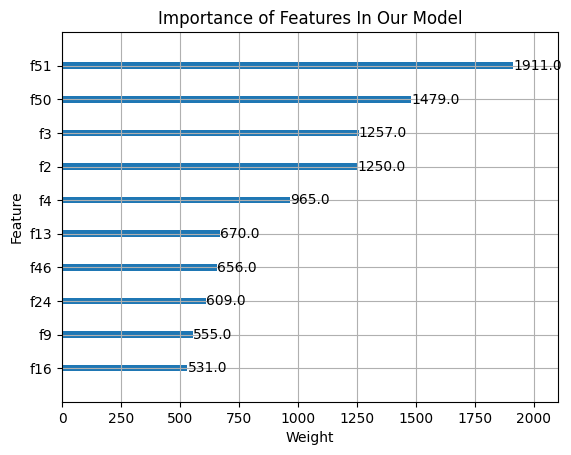

In [44]:
# We can take a look at the feature importances in our model

xgb.plot_importance(xmas_pipeline3['regressor'], importance_type='weight', xlabel='Weight', ylabel='Feature', title='Importance of Features In Our Model', max_num_features=10)
plt.show()

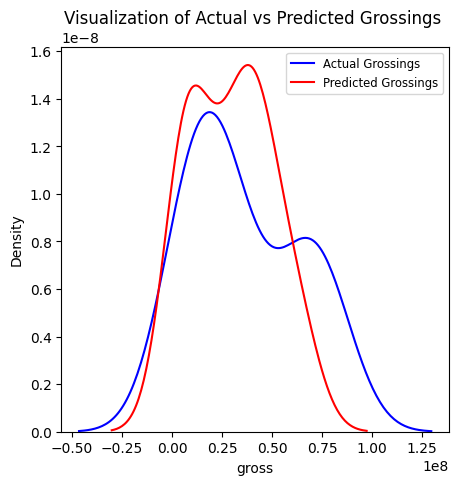

In [45]:
# Let's visualize the difference in distribution between our predicted grossings and actual grossings 

plt.figure(figsize = (5, 5))
ax = sns.distplot(y_valid, hist = False, color = "b", label = "Actual Grossings")
sns.distplot(predicted_grossings3, hist = False, color = "r", label = "Predicted Grossings", ax = ax)
plt.title("Visualization of Actual vs Predicted Grossings ")
plt.legend( fontsize = 'small')
plt.show()

## This concludes the project.



## - Abiodun Eesuola

# Backdrop ↓

# Predicting Christmas Movie Grossings

## 📖 Background

Imagine harnessing the power of data science to unveil the hidden potential of movies before they even hit the silver screen! As a data scientist at a forward-thinking cinema, you're at the forefront of an exhilarating challenge: crafting a cutting-edge system that doesn't just predict movie revenues, but reshapes the entire landscape of cinema profitability. This isn't just about numbers; it's about blending art with analytics to revolutionize how movies are marketed, chosen, and celebrated.

Your mission? To architect a predictive model that dives deep into the essence of a movie - from its title and running time to its genre, captivating description, and star-studded cast. And what better way to sprinkle some festive magic on this project than by focusing on a dataset brimming with Christmas movies? A highly-anticipated Christmas movie is due to launch soon, but the cinema has some doubts. It wants you to predict its success, so it can decide whether to go ahead with the screening or not. It's a unique opportunity to blend the cheer of the holiday season with the rigor of data science, creating insights that could guide the success of tomorrow's blockbusters. Ready to embark on this cinematic adventure?



## 💾 The data

We're providing you with a dataset of 788 Christmas movies, with the following columns:

* `christmas_movies.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the rating/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

You may also use an additional dataset of 1000 high-rated movies, with the following columns:

* `imdb_top1k.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the ratig/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

Finally you have access to a dataset of movie production budgets for over 6,000 movies, with the following columns:

* `movie_budgets.csv`

| Variable            | Meaning                         |
|---------------------|---------------------------------|
| `year`              | year the movie was released     |
| `date`              | date the movie was released     |
| `title`             | title of the movie              |
| `production budget` | production budget in US dollars |


**Note: while you may augment the Christmas movies with the general movie data, the model should be developed to predict ratings of Christmas movies only.**

## 💪 Competition challenge

Create a report that covers the following:
1. Exploratory data analysis of the dataset with informative plots. It's up to you what to include here! Some ideas could include:
    * Analysis of the genres
    * Descriptive statistics and histograms of the grossings
    * Word clouds
2. Develop a model to predict the movie's domestic gross based on the available features.
     * Remember to preprocess and clean the data first.
     * Think about what features you could define (feature engineering), e.g.:
       * _number of times a director appeared in the top 1000 movies list_,
       * _highest grossing for lead actor(s)_,
       * _decade released_
3. Evaluate your model using appropriate metrics.
4. Explain some of the limitations of the models you have developed. What other data might help improve the model?
5. Use your model to predict the grossing of the following fictitious Christmas movie:

**Title**: The Magic of Bellmonte Lane

**Description**:
"The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

**Director**: Greta Gerwig

**Cast**:
- Emma Thompson as Emily, a kind-hearted and curious woman
- Ian McKellen as Mr. Grayson, the stern corporate developer
- Tom Hanks as George, the wise and elderly owner of the local cafe
- Zoe Saldana as Sarah, Emily's supportive best friend
- Jacob Tremblay as Timmy, a young boy with a special Christmas wish

**Runtime**: 105 minutes

**Genres**: Family, Fantasy, Romance, Holiday

**Production budget**: $25M



## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!